# 5.12. Strategie dla klasyfikacji wieloklasowej

Omówiliśmy w tym rozdziale metody klasyfikacji binarnej. Tego typu problemy są powszechne, ale często spotkamy się także z takimi, w których liczba możliwości jest większa od dwóch. Klasyfikatory binarne są podstawą do stworzenia także klasyfikatorów wieloklasowych. Nie wszystkie metody są jednak dostosowane do tego w sposób bezpośredni i czasem wymagają zastosowania pewnych dodatkowych strategii.


In [2]:
import pandas as pd
import numpy as np

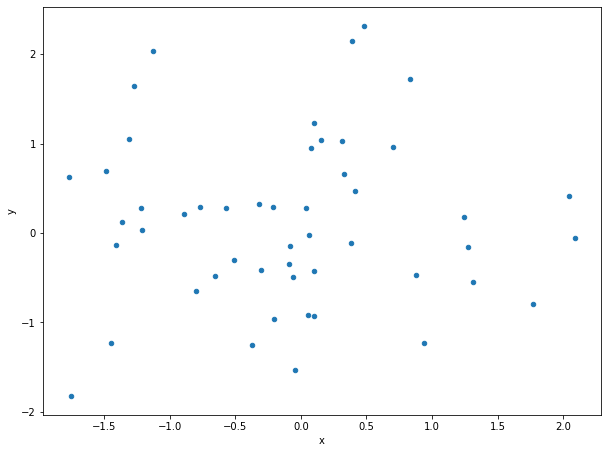

In [28]:
np.random.seed(2020)

one_df = pd.DataFrame({
    "x": np.random.normal(size=50),
    "y": np.random.normal(size=50),
})

one_df.plot.scatter(x="x", y="y", 
                    figsize=(10.0, 7.5))

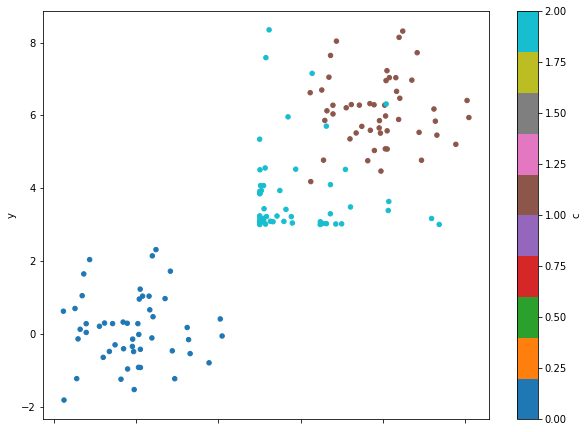

In [30]:
blobs_df = pd.concat([
    one_df.assign(c=0),
    (one_df + 6).assign(c=1),
    (one_df ** 2 + 3).assign(c=2),
])

blobs_df.plot.scatter(x="x", y="y", c="c",
                      cmap="tab10",
                      figsize=(10.0, 7.5))

Mamy więc problem, w którym jedna z podklas jest łatwo separowalna, a pozostałe dwie delikatnie z sobą związane.

## Strategie rozszerzania klasyfikatorów binarnych do wieloklasowych

### One-vs-Rest

Aplikowanie metod takich jak regresja logistyczna do rozpoznawania wielu klas jest możliwe m.in. dzięki stworzeniu szeregu klasyfikatorów, gdzie zadaniem każdego pojedynczego klasyfikatora jest detekcja pewnej pojedynczej klasy. W strategii One-vs-Rest, dla problemu N-klasowego mamy $ N $ modeli, gdzie każdy z nich rozpoznaje pewną specyficzną etykietę. 

Dość istotne jest tutaj to, aby nasze bazowe modele zwracały pewną wartości pewności co do przynależności obiektu do danej klasy, dzięki czemu możemy zawsze wybrać tę, która ma przypisane maksymalne prawdopodobieństwo.

In [31]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [32]:
svm = LinearSVC(max_iter=10000)
one_vs_rest = OneVsRestClassifier(svm)

In [33]:
one_vs_rest.fit(blobs_df.drop(columns="c"),
                blobs_df["c"])

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=10000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None)

In [34]:
x_test = np.linspace(-2, 10, 1000)
y_test = np.linspace(-2, 10, 1000)

In [35]:
import matplotlib.pyplot as plt

In [36]:
xx, yy = np.meshgrid(x_test, y_test)
Z = one_vs_rest.predict(np.c_[xx.ravel(), yy.ravel()]) \
    .reshape(xx.shape)

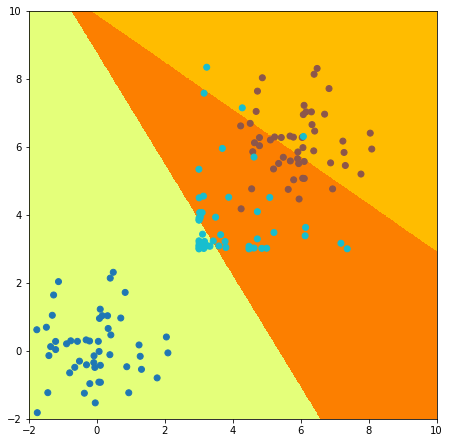

In [38]:
plt.figure(figsize=(10.5, 7.5))
plt.imshow(Z, interpolation="nearest",
           extent=(-2, 10, -2, 10),
           cmap="Wistia", origin="lower")
plt.scatter(blobs_df["x"], blobs_df["y"], 
            c=blobs_df["c"], cmap="tab10")

### One-vs-One

W tej strategii tworzymy $ \frac{n (n - 1)}{2} $ klasyfikatorów, osobno dla każdej pary klas. Aby poprawnie zaklasyfikować daną obserwację przeprowadzamy głosowanie i wybieramy tę klasę, która zdobędzie najwięcej głosów.

In [39]:
from sklearn.multiclass import OneVsOneClassifier

In [40]:
one_vs_one = OneVsOneClassifier(svm)

In [41]:
one_vs_one.fit(blobs_df.drop(columns="c"),
               blobs_df["c"])

OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=10000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   n_jobs=None)

In [42]:
Z = one_vs_one.predict(np.c_[xx.ravel(), yy.ravel()]) \
    .reshape(xx.shape)

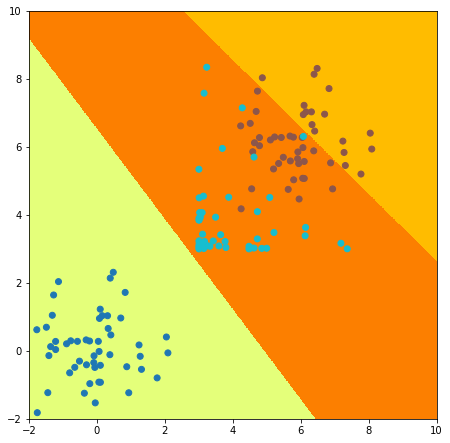

In [43]:
plt.figure(figsize=(10.5, 7.5))
plt.imshow(Z, interpolation="nearest",
           extent=(-2, 10, -2, 10),
           cmap="Wistia", origin="lower")
plt.scatter(blobs_df["x"], blobs_df["y"], 
            c=blobs_df["c"], cmap="tab10")

## Liczenie skuteczności w przypadku wielu klas

Metryki, jakie liczyliśmy dla klasyfikacji binarnej, nie są wprost aplikowalne dla klasyfikacji, ponieważ nie da się wprost wyliczyć wartości $ TP $, $ TN $, $ FP $ oraz $ FN $. Istnieją jednak rozszerzenia tych metryk, a funkcje dostępne w scikit-learn wspierają nie tylko przypadki dwuklasowe.